In [127]:
import numpy as np
import pandas   as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
train  =  pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [129]:
train.isna().sum(), test.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## `Handling Missing Data`

- Age
- Cabin
- Embarked
- Fare

### AGE

#### Training Data

In [131]:
def collect(name):
    return name.split(',')[1].split(' ')[1]

In [132]:
train['Title']=train['Name'].apply(collect)
# test['Title']=test['Name'].apply(collect)

In [133]:
train['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [134]:
for name in train['Title'].unique():
    train[(train['Age'].isna()) & (train['Title']=='name')]['Age'].fillna(train[train['Title']==name]['Age'].mean(),inplace=True)


C:\Users\kul78\AppData\Local\Temp\ipykernel_12264\1914933407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[(train['Age'].isna()) & (train['Title']=='name')]['Age'].fillna(train[train['Title']==name]['Age'].mean(),inplace=True)


*Due to SettingWithCopyWarning, we choose different method to fill the missing values of age column using apply method.*

In [135]:
mean_by_title_train = train.groupby('Title').mean()['Age']

In [136]:
pd_null = train[train["Age"].isna()]["Age"].loc[5]

In [137]:
pd_null

nan

In [138]:
str(pd_null) == "nan"

True

In [139]:
train[train['Title']=='Mr.']['Age'].mean()

32.368090452261306

In [140]:
mean_by_title_train["Dr."]

42.0

In [141]:
def fill_age(row):
    if row["Age"] == pd_null:
        val=row['Title']
        return mean_by_title_train[val]
    else:
        return row["Age"]

train.apply(fill_age, axis=1).isna().sum()

177

*Here row["Age] is not equal to pd_null*

In [142]:
def fill_age(row):
    if str(row["Age"]) == str(pd_null):
        val=row['Title']
        return mean_by_title_train[val]
    else:
        return row["Age"]

In [143]:
train.apply(fill_age, axis=1)#along rows since axis = 1, for all rows we write train.apply(...)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    21.773973
889    26.000000
890    32.000000
Length: 891, dtype: float64

In [144]:
train['Age']=train.apply(fill_age, axis=1)

In [145]:
train['Age'].isna().sum()

0

In [146]:
# mean_ages = train.groupby(['SibSp', 'Parch', 'Sex']).mean()['Age'].reset_index()
# mean_ages["Age"] = mean_ages["Age"].round(2)
# mean_ages

In [147]:
# def fill_age_na_2(row):
#     n_sibsp = row['SibSp']
#     n_parch = row['Parch']
#     sex = row["Sex"]
#     age = row['Age']
#     for i,j, gender, k in zip(mean_ages['SibSp'].values, mean_ages['Parch'].values, mean_ages['Sex'].values, mean_ages['Age'].values):
#         if i==n_sibsp and j==n_parch and gender == sex and np.isnan(age):
#             row['Age'] = k
#             return row
#     return row

#### Test Data

In [148]:
test['Title']=test['Name'].apply(collect)

In [149]:
test['Title'].isna().sum()

0

In [150]:
test[test['Title']=='Ms.']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms.


In [151]:
mean_by_title_test = test.groupby('Title').mean()['Age']
mean_by_title_test

Title
Col.       50.000000
Dona.      39.000000
Dr.        53.000000
Master.     7.406471
Miss.      21.774844
Mr.        32.000000
Mrs.       38.903226
Ms.              NaN
Rev.       35.500000
Name: Age, dtype: float64

In [152]:
def fill_age(row):
    if str(row["Age"]) == str(pd_null):
        val=row['Title']
        return mean_by_title_test[val]
    else:
        return row["Age"]

In [153]:
test['Age']=test.apply(fill_age, axis=1)

In [154]:
test['Age'].isna().sum()


1

In [155]:
test['Age'].fillna(mean_by_title_train['Ms.'], inplace=True)

In [156]:
test['Age'].isna().sum()

0

### FARE

#### Training Data

No missing values of Fare column in training data.

In [157]:
train['Fare'].isna().sum()

0

#### Test Data

In [158]:
test['Fare'].isna().sum()

1

In [159]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr.


In [160]:
mean_Fare_test = test.groupby(['SibSp', 'Parch', 'Sex']).mean()['Fare'].reset_index()
mean_Fare_test["Fare"] = mean_Fare_test["Fare"].round(2)
mean_Fare_test

,SibSp,Parch,Sex,Fare
0,0,0,female,39.51
1,0,0,male,16.71
2,0,1,female,101.79
3,0,1,male,21.66
4,0,2,female,29.89
5,0,2,male,41.78
6,0,3,female,39.00
7,0,4,female,25.47
8,1,0,female,50.43
9,1,0,male,49.08


In [161]:
missing_val=mean_Fare_test[(mean_Fare_test['SibSp']==0)&(mean_Fare_test['Parch']==0)&(mean_Fare_test['Sex']=='male')]
missing_val

,SibSp,Parch,Sex,Fare
1,0,0,male,16.71


In [162]:
# test['Fare'].fillna(missing_val["Fare"],inplace=True)

In [163]:
# test['Fare'].isna().sum()

In [164]:
test['Fare'].fillna(16.71,inplace=True)

In [165]:
test['Fare'].isna().sum()

0

### EMBARKED

#### Training Data

In [166]:
train['Embarked'].isna().sum()

2

In [167]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

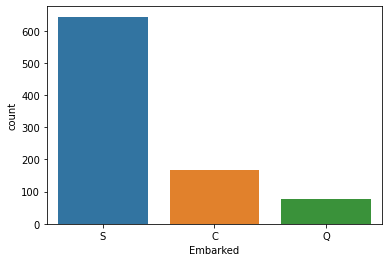

In [168]:
sns.countplot(x='Embarked', data=train);

In [169]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [170]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [171]:
train['Embarked'].isna().sum()

0

#### Test Data

In [172]:
test['Embarked'].isna().sum()

0

In [173]:
test['Embarked'].mode()
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

### CABIN

#### Training Data

In [174]:
train['Cabin'].isna().sum()

687

#### Test Data

In [175]:
test['Cabin'].isna().sum()

327

## `FEATURE ENGINEERING`

### CABIN

#### Training Data

In [176]:

train['Cabin_num'] = train['Cabin'].str.extract('(\d+)') # captures numerical part
train['Cabin_cat'] = train['Cabin'].str[0] # captures the first letter

In [177]:
train['Cabin_num'].unique()

array([nan, '85', '123', '46', '6', '103', '56', '23', '78', '33', '30',
       '52', '28', '83', '73', '31', '5', '10', '26', '110', '58', '101',
       '69', '47', '86', '2', '19', '7', '49', '4', '32', '80', '36',
       '15', '93', '35', '87', '77', '67', '94', '125', '99', '118', '22',
       '106', '65', '54', '57', '34', '18', '124', '91', '40', '128',
       '37', '50', '82', '96', '44', '104', '111', '92', '38', '21', '12',
       '63', '14', '20', '79', '25', '95', '39', '70', '16', '68', '41',
       '9', '48', '126', '71', '51', '62', '24', '90', '45', '8', '121',
       '11', '3', '17', '102', '42', '148'], dtype=object)

In [178]:
train['Cabin_cat'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:xlabel='Cabin_cat', ylabel='count'>

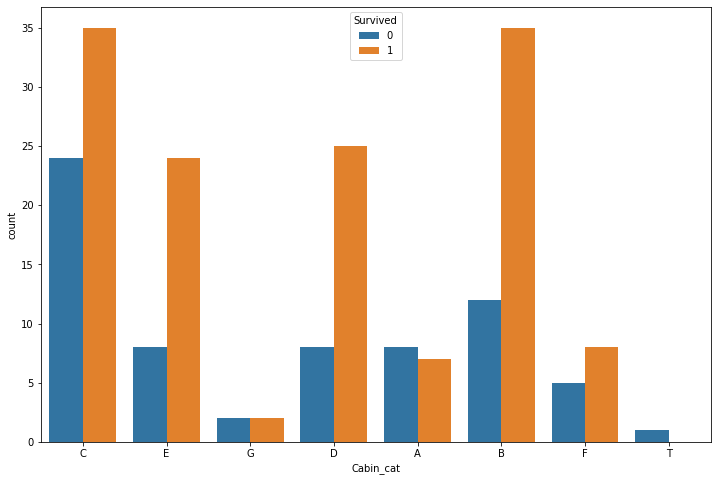

In [179]:
plt.figure(figsize=(12,8))
sns.countplot(x='Cabin_cat', data=train, hue='Survived')

In [180]:
train['Cabin_cat'].fillna('N', inplace=True) # fill missing values with 'N' and 'N' = 'No Cabin'

In [181]:
train['Cabin_cat'].isna().sum()

0

<AxesSubplot:>

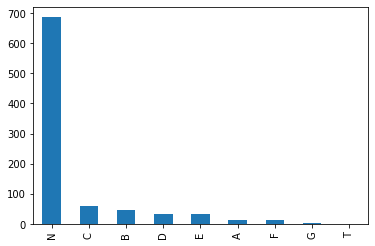

In [182]:
train['Cabin_cat'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Cabin_cat', ylabel='count'>

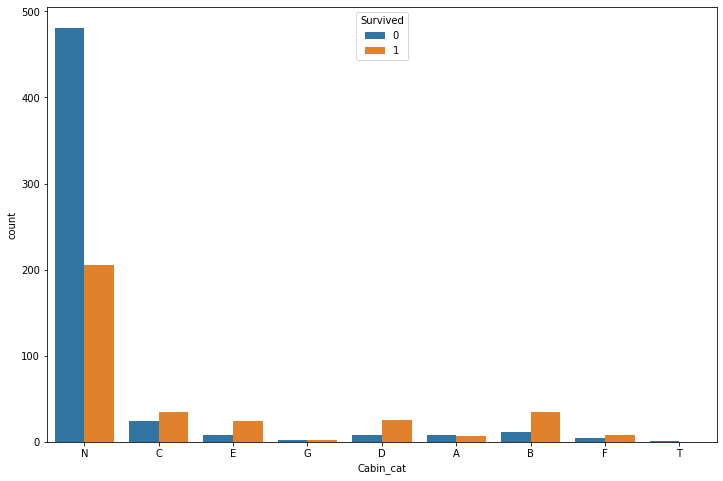

In [183]:
plt.figure(figsize=(12,8))
sns.countplot(x='Cabin_cat', data=train, hue='Survived')

In [184]:
train.drop(labels=['Cabin','Cabin_num'], axis=1,inplace=True)

#### Test Data

In [185]:
test['Cabin_num'] = test['Cabin'].str.extract('(\d+)') # captures numerical part
test['Cabin_cat'] = test['Cabin'].str[0] # captures the first letter

In [186]:
test['Cabin_num'].unique()

array([nan, '45', '31', '57', '36', '21', '78', '34', '19', '9', '15',
       '23', '63', '61', '53', '43', '130', '132', '101', '55', '71',
       '46', '116', '29', '6', '28', '51', '54', '97', '22', '10', '4',
       '52', '30', '58', '62', '11', '80', '33', '85', '37', '86', '89',
       '26', '69', '32', '2', '18', '106', '60', '50', '39', '24', '41',
       '7', '40', '38', '105'], dtype=object)

In [187]:
test['Cabin_cat'].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

<AxesSubplot:xlabel='Cabin_cat', ylabel='count'>

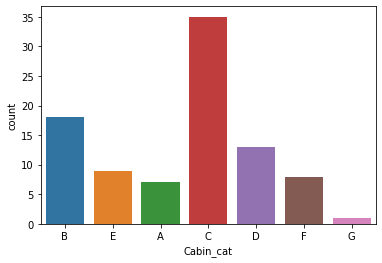

In [188]:
sns.countplot(x='Cabin_cat', data=test)

In [189]:
test['Cabin_cat'].isna().sum()

327

In [190]:
test['Cabin_cat'].fillna('N', inplace=True) # fill missing values with 'N' and 'N' = 'No Cabin'

<AxesSubplot:xlabel='Cabin_cat', ylabel='count'>

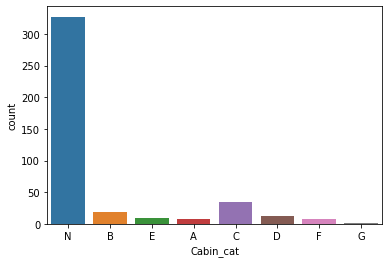

In [191]:
sns.countplot(x='Cabin_cat', data=test)

In [192]:
test.drop(labels=['Cabin','Cabin_num'], axis=1,inplace=True)

### AGE

#### Training Data

In [193]:
train['Age'].describe()

count    891.000000
mean      29.754659
std       13.277179
min        0.420000
25%       21.773973
50%       30.000000
75%       35.898148
max       80.000000
Name: Age, dtype: float64

In [194]:
train.loc[train['Age'].between(0, 10, 'right'), 'Age Range'] = '(0-10]'
train.loc[train['Age'].between(10, 20, 'right'), 'Age Range'] = '(10-20]'
train.loc[train['Age'].between(20, 30, 'right'), 'Age Range'] = '(20-30]'
train.loc[train['Age'].between(30, 40, 'right'), 'Age Range'] = '(30-40]'
train.loc[train['Age'].between(40, 50, 'right'), 'Age Range'] = '(40-50]'
train.loc[train['Age'].between(50, 60, 'right'), 'Age Range'] = '(50-60]'
train.loc[train['Age'].between(60, 70, 'right'), 'Age Range'] = '(60-70]'
train.loc[train['Age'].between(70, 80, 'right'), 'Age Range'] =  '(70-80]'

In [195]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_cat,Age Range
808,809,0,2,"Meyer, Mr. August",male,39.00000,0,0,248723,13.0000,S,Mr.,N,(30-40]
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00000,0,2,2653,15.7417,C,Miss.,N,(0-10]
410,411,0,3,"Sdycoff, Mr. Todor",male,32.36809,0,0,349222,7.8958,S,Mr.,N,(30-40]
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.00000,0,0,7267,9.2250,S,Mr.,N,(20-30]
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.00000,1,0,345572,17.4000,S,Mrs.,N,(30-40]


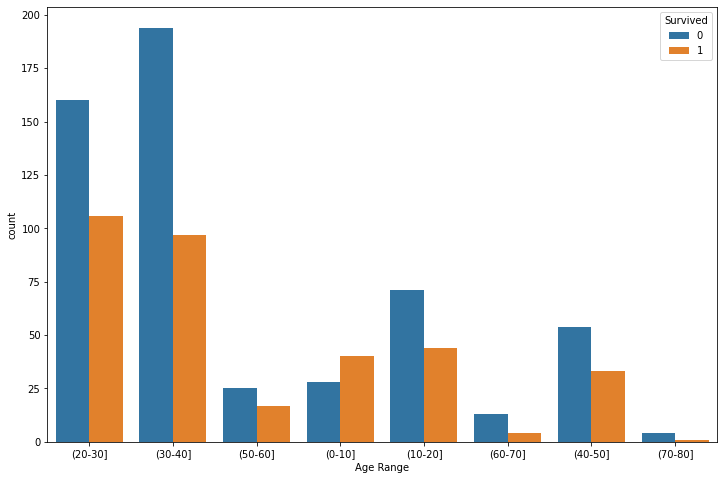

In [196]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age Range', data=train, hue='Survived');

#### Test Data

In [197]:
test.loc[test['Age'].between(0, 10, 'right'), 'Age Range'] = '(0-10]'
test.loc[test['Age'].between(10, 20, 'right'), 'Age Range'] = '(10-20]'
test.loc[test['Age'].between(20, 30, 'right'), 'Age Range'] = '(20-30]'
test.loc[test['Age'].between(30, 40, 'right'), 'Age Range'] = '(30-40]'
test.loc[test['Age'].between(40, 50, 'right'), 'Age Range'] = '(40-50]'
test.loc[test['Age'].between(50, 60, 'right'), 'Age Range'] = '(50-60]'
test.loc[test['Age'].between(60, 70, 'right'), 'Age Range'] = '(60-70]'
test.loc[test['Age'].between(70, 80, 'right'), 'Age Range'] =  '(70-80]'

In [198]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_cat,Age Range
63,955,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,Q,Miss.,N,(20-30]
169,1061,3,"Hellstrom, Miss. Hilda Maria",female,22.0,0,0,7548,8.9625,S,Miss.,N,(20-30]
60,952,3,"Dika, Mr. Mirko",male,17.0,0,0,349232,7.8958,S,Mr.,N,(10-20]
338,1230,2,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,S,Mr.,N,(20-30]
139,1031,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,S,Mr.,N,(30-40]


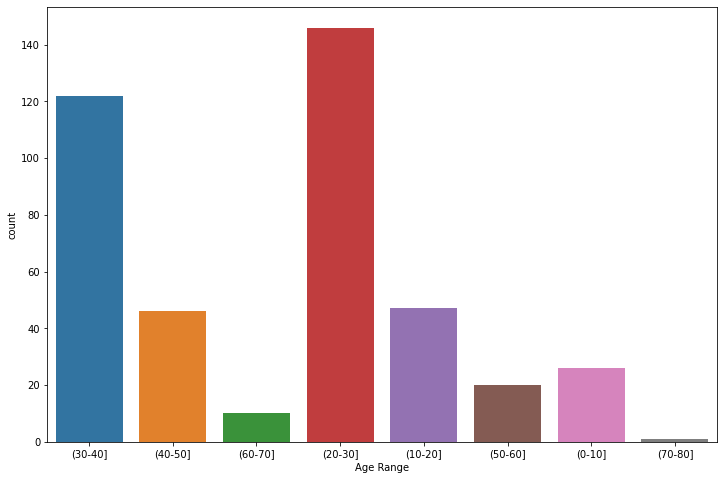

In [199]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age Range', data=test);

### FAMILY = SIBSP + PARCH

#### Training Data

In [200]:
train['Family'] = train.Parch + train.SibSp

In [201]:
# train['Family'] = train['Parch'] + train['SibSp']

In [202]:
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_cat,Age Range,Family
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,C,Mr.,N,(30-40],0
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,C,Miss.,N,(40-50],0
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,S,Miss.,N,(20-30],3


In [203]:
train['Family'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

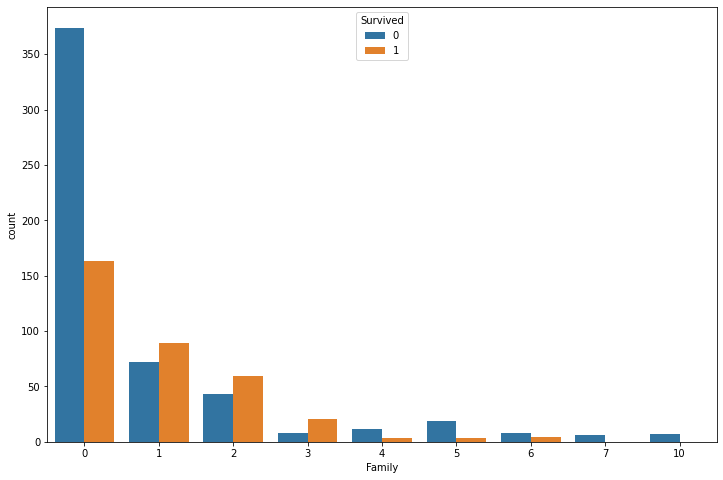

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(x='Family', data=train, hue='Survived');

In [205]:
train['Is Alone'] = train.Family == 0

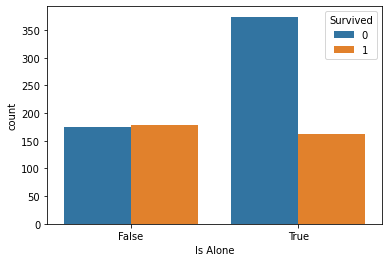

In [206]:
sns.countplot(x='Is Alone', data=train, hue='Survived');

In [207]:
train.drop(labels=['Parch','SibSp'], axis=1, inplace=True)

In [208]:
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,Cabin_cat,Age Range,Family,Is Alone
221,222,0,2,"Bracken, Mr. James H",male,27.000000,220367,13.0000,S,Mr.,N,(20-30],0,True
573,574,1,3,"Kelly, Miss. Mary",female,21.773973,14312,7.7500,Q,Miss.,N,(20-30],0,True
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,4.574167,2661,15.2458,C,Master.,N,(0-10],2,False


#### Test Data

In [209]:
test['Family'] = test['Parch'] + test['SibSp']

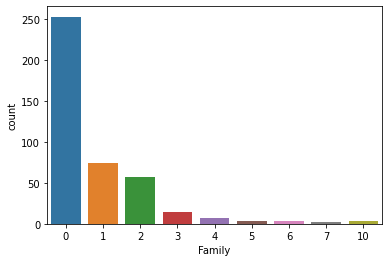

In [210]:
sns.countplot(x='Family', data=test);

In [211]:
test['Is Alone'] = test['Family'] == 0

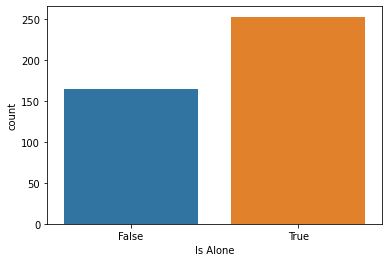

In [212]:
sns.countplot(x='Is Alone', data=test);

In [213]:
test.drop(labels=['Parch','SibSp'], axis=1, inplace=True)

In [214]:
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,Cabin_cat,Age Range,Family,Is Alone
256,1148,3,"Mahon, Mr. John",male,32.0,AQ/4 3130,7.7500,Q,Mr.,N,(30-40],0,True
289,1181,3,"Ford, Mr. Arthur",male,32.0,A/5 1478,8.0500,S,Mr.,N,(30-40],0,True
156,1048,1,"Bird, Miss. Ellen",female,29.0,PC 17483,221.7792,S,Miss.,C,(20-30],0,True


### FARE

#### Training Data

In [215]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [216]:
train.loc[train['Fare'].between(0,  7.895800, 'left'), 'Fare Category'] = 'Low'
train.loc[train['Fare'].between( 7.895800,14.454200, 'left'), 'Fare Category'] = 'Mid'
train.loc[train['Fare'].between(14.454200,31.275000, 'left'), 'Fare Category'] = 'High_Mid'
train.loc[train['Fare'].between(31.275000,513, 'left'), 'Fare Category'] = 'High'

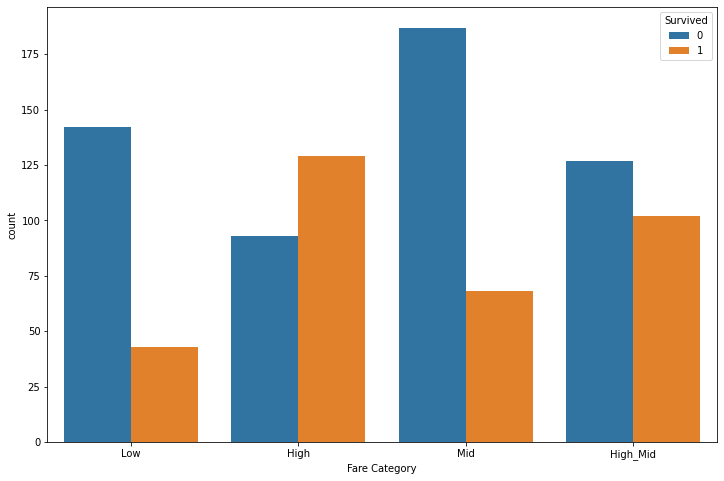

In [217]:
plt.figure(figsize=(12,8))
sns.countplot(x='Fare Category', data=train, hue='Survived');

In [218]:
train.shape

(891, 15)

#### Test Data

In [219]:
test['Fare'].describe()

count    418.000000
mean      35.581932
std       55.848166
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [220]:
test.loc[test['Fare'].between(0,  7.895800, 'left'), 'Fare Category'] = 'Low'
test.loc[test['Fare'].between( 7.895800,14.454200, 'left'), 'Fare Category'] = 'Mid'
test.loc[test['Fare'].between(14.454200, 31.471875, 'left'), 'Fare Category'] = 'High_Mid'
test.loc[test['Fare'].between( 31.471875,513, 'left'), 'Fare Category'] = 'High'

In [221]:
test.shape

(418, 14)

### PASENGER_ID and TICKET_ID

In [222]:
train.drop(labels=['PassengerId','Ticket'], axis=1, inplace=True)

In [223]:
test.drop(labels=['PassengerId','Ticket'], axis=1, inplace=True)

### NAME

#### Training Data

*We already did feature engineering of `Name` column while dealing Missing values of AGE DATA*

In [224]:
train.drop(labels='Name', axis=1, inplace=True)

In [225]:
train.shape

(891, 12)

In [226]:
train.sample(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Cabin_cat,Age Range,Family,Is Alone,Fare Category
199,0,2,female,24.0,13.0,S,Miss.,N,(20-30],0,True,Mid
236,0,2,male,44.0,26.0,S,Mr.,N,(40-50],1,False,High_Mid
728,0,2,male,25.0,26.0,S,Mr.,N,(20-30],1,False,High_Mid


In [227]:
test.drop(labels='Name', axis=1, inplace=True)

In [228]:
test.shape

(418, 11)

In [229]:
test.sample(3)

,Pclass,Sex,Age,Fare,Embarked,Title,Cabin_cat,Age Range,Family,Is Alone,Fare Category
148,1,male,32.0,26.55,S,Mr.,N,(30-40],0,True,High_Mid
258,2,female,19.0,13.00,S,Miss.,N,(10-20],0,True,Mid
402,1,female,22.0,59.40,C,Miss.,N,(20-30],1,False,High


In [230]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'Cabin_cat', 'Age Range', 'Family', 'Is Alone', 'Fare Category'],
      dtype='object')

In [231]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'Cabin_cat',
       'Age Range', 'Family', 'Is Alone', 'Fare Category'],
      dtype='object')

In [107]:
# for train_col in train.columns:
#     for test_col in test.columns:
#         if train_col == test_col:
#             break
#         else:
#             continue



## `Convert categorical data into numerical one`

In [108]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'Cabin_cat', 'Age Range', 'Family', 'Is Alone', 'Fare Category'],
      dtype='object')

In [109]:
final_train=pd.get_dummies(train,columns=['Pclass','Family','Sex','Is Alone','Embarked','Fare Category','Title','Cabin_cat','Age Range'],drop_first=True)

In [110]:
final_train.shape

(891, 51)

In [111]:
final_train.sample(3)

,Survived,Age,Fare,Pclass_2,Pclass_3,Family_1,Family_2,Family_3,Family_4,Family_5,...,Cabin_cat_G,Cabin_cat_N,Cabin_cat_T,Age Range_(10-20],Age Range_(20-30],Age Range_(30-40],Age Range_(40-50],Age Range_(50-60],Age Range_(60-70],Age Range_(70-80]
205,0,2.0,10.4625,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
806,0,39.0,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
342,0,28.0,13.0000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [112]:
final_test=pd.get_dummies(test,columns=['Pclass','Family','Sex','Is Alone','Embarked','Fare Category','Title','Cabin_cat','Age Range'],drop_first=True)

In [113]:
final_test.shape

(418, 41)

In [114]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Family_1',
       'Family_2', 'Family_3', 'Family_4', 'Family_5', 'Family_6', 'Family_7',
       'Family_10', 'Sex_male', 'Is Alone_True', 'Embarked_Q', 'Embarked_S',
       'Fare Category_High_Mid', 'Fare Category_Low', 'Fare Category_Mid',
       'Title_Col.', 'Title_Don.', 'Title_Dr.', 'Title_Jonkheer.',
       'Title_Lady.', 'Title_Major.', 'Title_Master.', 'Title_Miss.',
       'Title_Mlle.', 'Title_Mme.', 'Title_Mr.', 'Title_Mrs.', 'Title_Ms.',
       'Title_Rev.', 'Title_Sir.', 'Title_the', 'Cabin_cat_B', 'Cabin_cat_C',
       'Cabin_cat_D', 'Cabin_cat_E', 'Cabin_cat_F', 'Cabin_cat_G',
       'Cabin_cat_N', 'Cabin_cat_T', 'Age Range_(10-20]', 'Age Range_(20-30]',
       'Age Range_(30-40]', 'Age Range_(40-50]', 'Age Range_(50-60]',
       'Age Range_(60-70]', 'Age Range_(70-80]'],
      dtype='object')

In [115]:
final_test.columns

Index(['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Family_1', 'Family_2',
       'Family_3', 'Family_4', 'Family_5', 'Family_6', 'Family_7', 'Family_10',
       'Sex_male', 'Is Alone_True', 'Embarked_Q', 'Embarked_S',
       'Fare Category_High_Mid', 'Fare Category_Low', 'Fare Category_Mid',
       'Title_Dona.', 'Title_Dr.', 'Title_Master.', 'Title_Miss.', 'Title_Mr.',
       'Title_Mrs.', 'Title_Ms.', 'Title_Rev.', 'Cabin_cat_B', 'Cabin_cat_C',
       'Cabin_cat_D', 'Cabin_cat_E', 'Cabin_cat_F', 'Cabin_cat_G',
       'Cabin_cat_N', 'Age Range_(10-20]', 'Age Range_(20-30]',
       'Age Range_(30-40]', 'Age Range_(40-50]', 'Age Range_(50-60]',
       'Age Range_(60-70]', 'Age Range_(70-80]'],
      dtype='object')

In [116]:
for col in final_train.columns:
    if col not in final_test.columns:
        print(col)

Survived
Title_Col.
Title_Don.
Title_Jonkheer.
Title_Lady.
Title_Major.
Title_Mlle.
Title_Mme.
Title_Sir.
Title_the
Cabin_cat_T


In [117]:
for col in final_train.columns:
    if col =='Survived':
        continue
    if col not in final_test.columns:
        final_train.drop(col, inplace = True,axis=1)

In [118]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Family_1',
       'Family_2', 'Family_3', 'Family_4', 'Family_5', 'Family_6', 'Family_7',
       'Family_10', 'Sex_male', 'Is Alone_True', 'Embarked_Q', 'Embarked_S',
       'Fare Category_High_Mid', 'Fare Category_Low', 'Fare Category_Mid',
       'Title_Dr.', 'Title_Master.', 'Title_Miss.', 'Title_Mr.', 'Title_Mrs.',
       'Title_Ms.', 'Title_Rev.', 'Cabin_cat_B', 'Cabin_cat_C', 'Cabin_cat_D',
       'Cabin_cat_E', 'Cabin_cat_F', 'Cabin_cat_G', 'Cabin_cat_N',
       'Age Range_(10-20]', 'Age Range_(20-30]', 'Age Range_(30-40]',
       'Age Range_(40-50]', 'Age Range_(50-60]', 'Age Range_(60-70]',
       'Age Range_(70-80]'],
      dtype='object')

In [119]:
final_train.shape

(891, 41)

In [120]:
final_test.shape

(418, 41)

In [121]:
for col in final_test.columns:
    if col not in final_train.columns:
        print(col)

Title_Dona.


In [122]:
for col in final_test.columns:
    if col not in final_train.columns:
        final_test.drop(col, inplace = True,axis=1)

In [123]:
final_test.shape

(418, 40)

In [124]:
for col in final_test.columns:
    if col not in final_train.columns:
        print(col)

## `Save the data`

In [232]:
final_train.to_csv('data/final_train_data.csv', index=False)

In [233]:
final_test.to_csv('data/final_test_data.csv', index=False)